# Global Power Plant Database
Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('database_IND.csv')
data.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


Fuel type is going to be a regression problem. Capacity has continuous data. Have also noticed lots of NaN values that will need to be dealt with.

In [3]:
data.shape

(907, 27)

In [4]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Mixture of data types

In [6]:
#Checking number of unique values 
data.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Other_fuel3, wepp_id, generation_gwh_2013 and 2019, and estimated_generation_gwh have no unique values

In [7]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Lots of null values that will need treating. I can see that the columns with 0 unique values are only populated with missing values so will need to be dropped. 

In [8]:
#descriptive statistic analysis
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


Vast difference between 75% and max in some columns which would suggest that there is going to be skew

In [9]:
# Dropping columns populated only with NaN
data.drop(columns=["other_fuel3", "wepp_id", "generation_gwh_2013", "generation_gwh_2019", "estimated_generation_gwh"], axis=1, inplace=True)

I've also noticed columns with just one unique value which won't be useful in analysis. These will be dropped too. 

In [10]:
# Dropping irrelvant columns
data.drop(columns=["country", "country_long", "generation_data_source", "gppd_idnr"], axis=1, inplace=True)

In [11]:
# Dropping irrelvant columns (only one value- 906 null values out of 907)
data.drop(columns=["other_fuel2"], axis=1, inplace=True)

In [12]:
# Dropping irrelvant columns
data.drop(columns=["url"], axis=1, inplace=True)

Both country columns only refer to India, so offer no insight. generation data source only had unique value and gppd_idnr also doesn't offer any insights into data

In [13]:
data.shape

(907, 16)

In [14]:
#checking nulls after removing columns 
data.isnull().sum()

name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
other_fuel1              709
commissioning_year       380
owner                    565
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [15]:
#populating null values with fullna method
#Using mean, median or mode depending on the type of data
data["latitude"] = data["latitude"].fillna(data["latitude"].mean())
data["longitude"] = data["longitude"].fillna(data["longitude"].median())
data["other_fuel1"] = data["other_fuel1"].fillna(data["other_fuel1"].mode()[0])
data["owner"] = data["owner"].fillna(data["owner"].mode()[0])
data["geolocation_source"] = data["geolocation_source"].fillna(data["geolocation_source"].mode()[0])
data["commissioning_year"] = data["commissioning_year"].fillna(data["commissioning_year"].median())
data["year_of_capacity_data"] = data["year_of_capacity_data"].fillna(data["year_of_capacity_data"].median())
data["generation_gwh_2018"] = data["generation_gwh_2018"].fillna(data["generation_gwh_2018"].median())
data["generation_gwh_2014"] = data["generation_gwh_2014"].fillna(data["generation_gwh_2014"].median())
data["generation_gwh_2015"] = data["generation_gwh_2015"].fillna(data["generation_gwh_2015"].median())
data["generation_gwh_2016"] = data["generation_gwh_2016"].fillna(data["generation_gwh_2016"].median())
data["generation_gwh_2017"] = data["generation_gwh_2017"].fillna(data["generation_gwh_2017"].median())

In [16]:
data.isnull().sum()

name                     0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
owner                    0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

No null values

In [17]:
data.head(5)

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,2001.0,AES,CDM,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [18]:
data.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'owner', 'source',
       'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [19]:
data.dtypes

name                      object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
other_fuel1               object
commissioning_year       float64
owner                     object
source                    object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

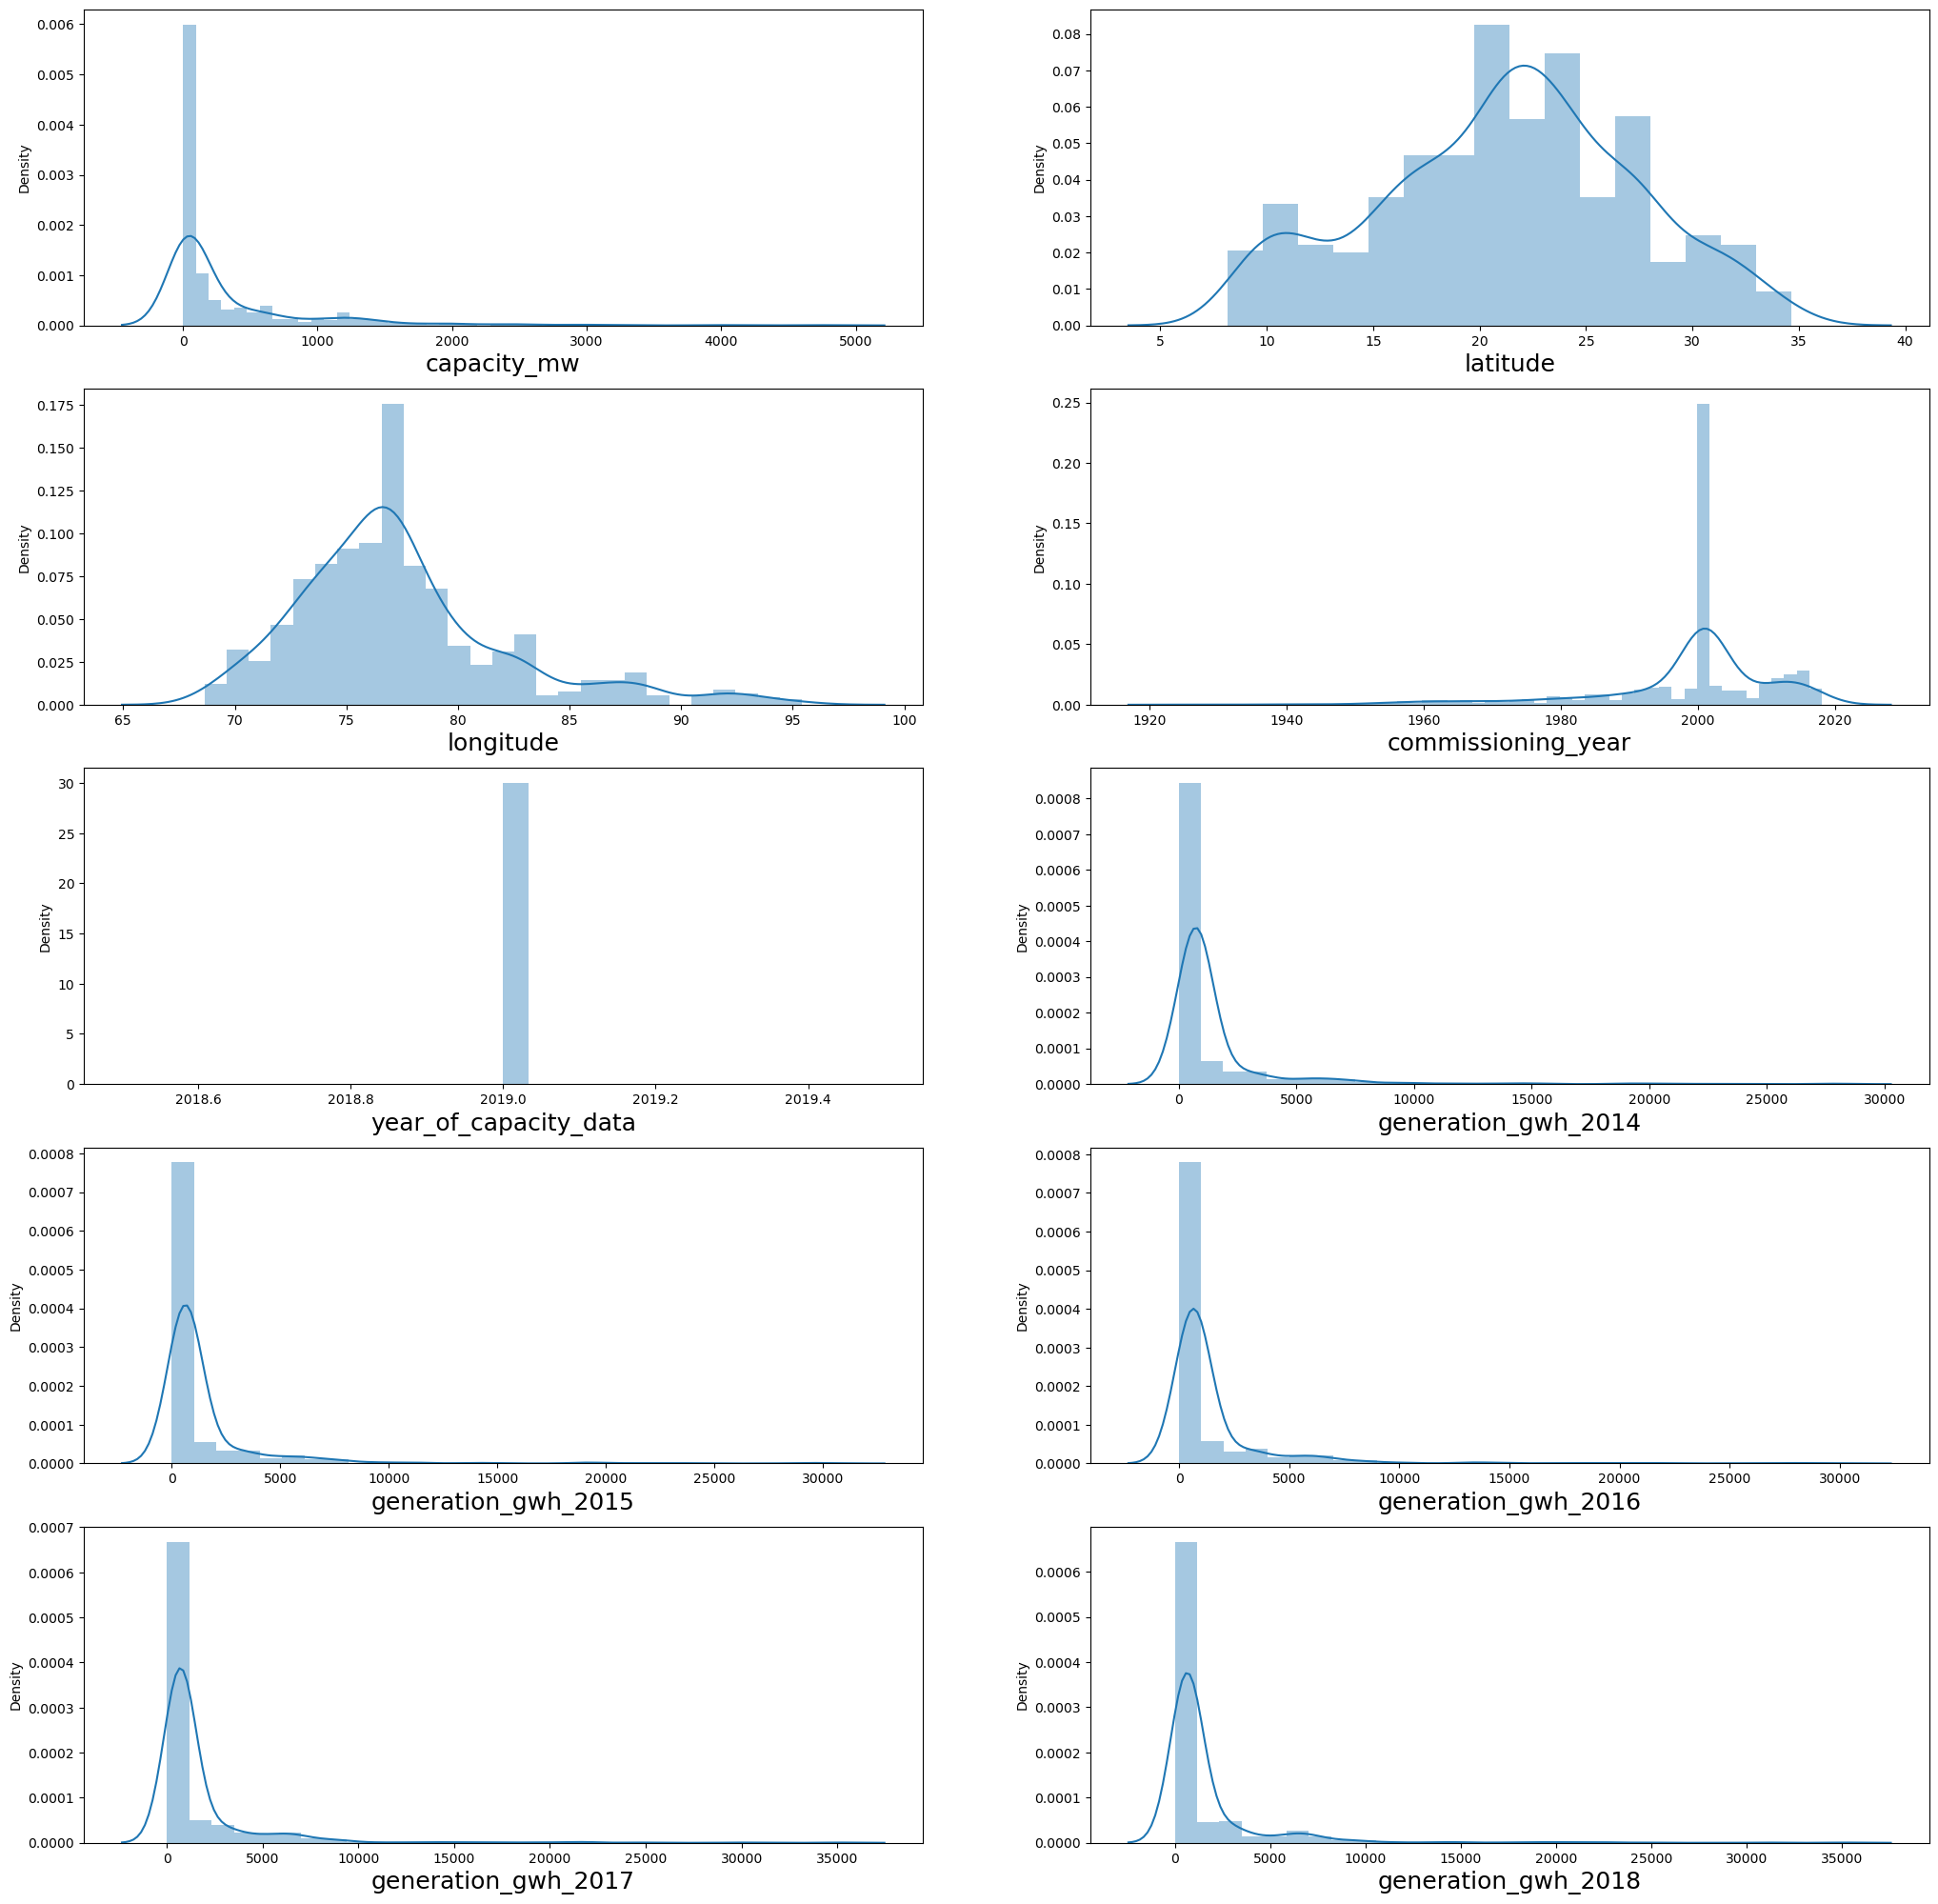

In [20]:
#Use distplots to check distribution of the numerical data
columns = ['capacity_mw', 'latitude', 'longitude',
       'commissioning_year','year_of_capacity_data', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018']

plotnumber = 1
plt.figure(figsize=(25,25))
for column in columns:
    if plotnumber <= 11:
        ax = plt.subplot(5, 2, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()

Other than commisioning year and latitude, there is a lot of left skew (Including the target variable). 

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

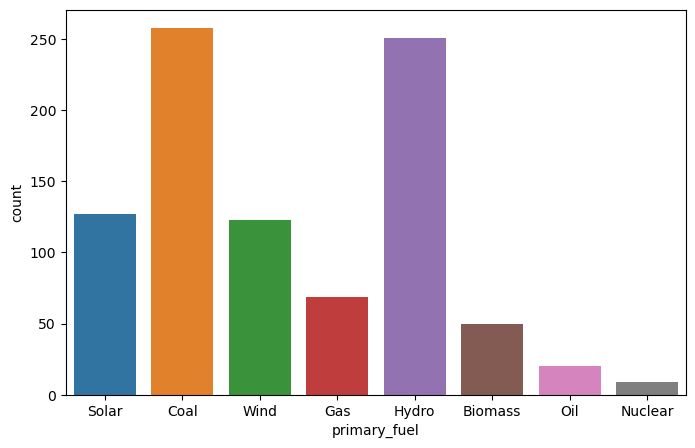

In [21]:
#Exploring non numerical data
plt.figure(figsize=(8,5))
sns.countplot(data['primary_fuel'])

Solar, Coal and Hydro are the three highest with Biomass, oil and Nuclear are the three lowest values.

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

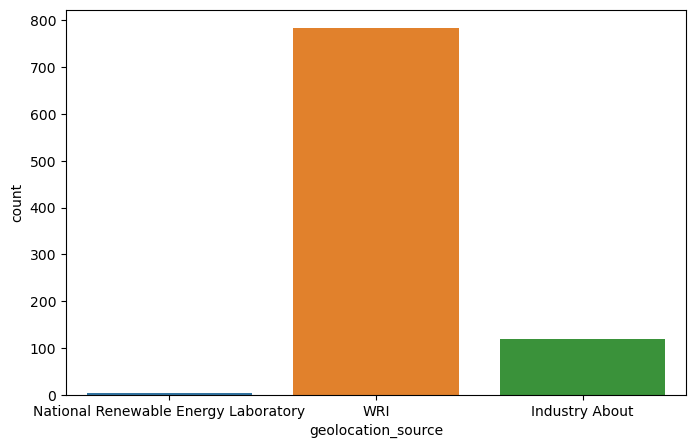

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data['geolocation_source'])

WRI is significantly higher than industry about and National renewanle energy laboratory

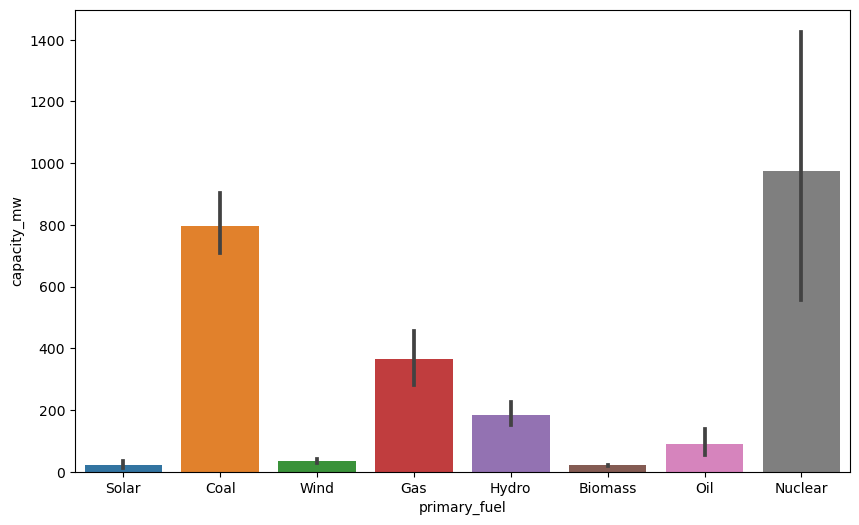

In [23]:
#Checking features relationship to target
plt.figure(figsize = (10,6))
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = data)
plt.show()

It is  apparent that nuclear is best for producing best megawatt capacity despite coal and hydro being significantly popular (Could be a range of environmental factors that have meant it is less popular). 

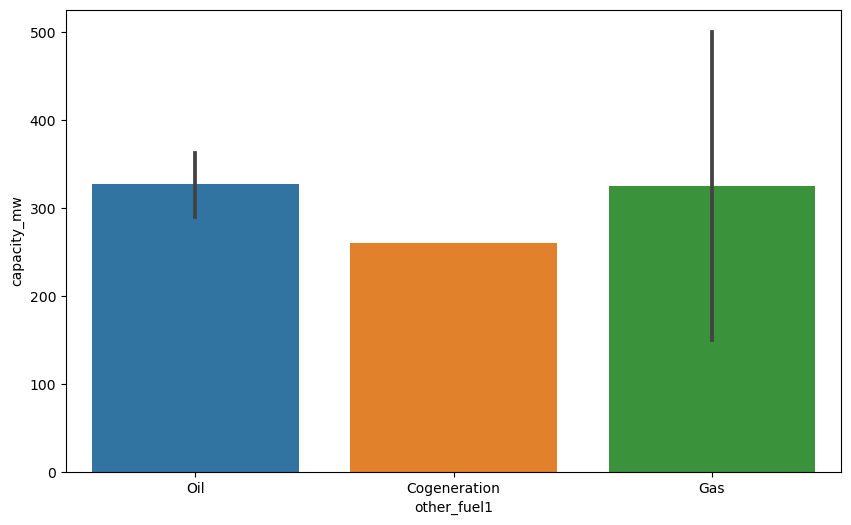

In [24]:
#Checking features relationship to target
plt.figure(figsize = (10,6))
sns.barplot(x = "other_fuel1", y = "capacity_mw", data = data)
plt.show()

Fairly equal among other fuel, but oil is the highest. 

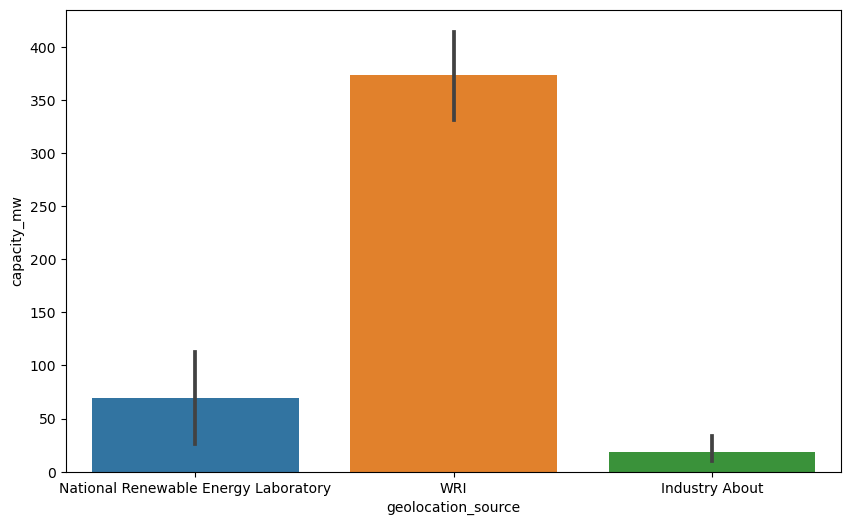

In [25]:
#Checking features relationship to target
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = data)
plt.show()

WRI is significantly higher, however, it has a significantly higher count. 

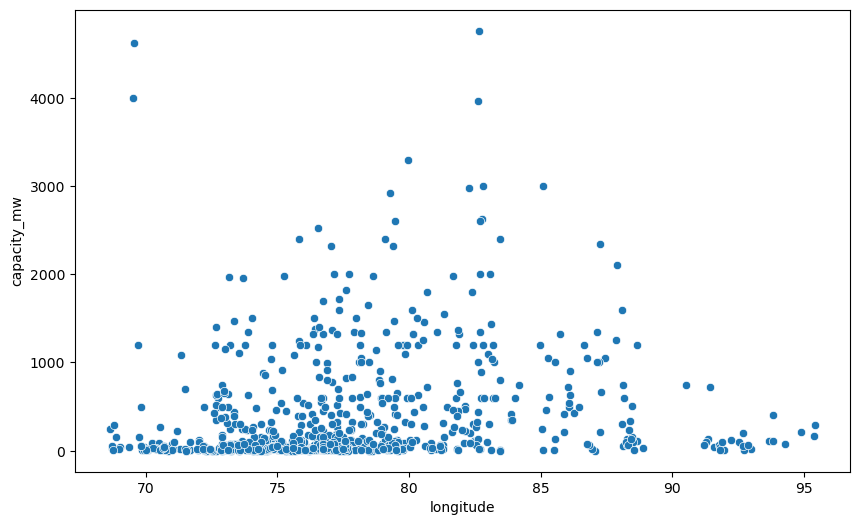

In [26]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "longitude", y = "capacity_mw", data = data)
plt.show()

Highest production is between 80-85. Data appears to have outliers.

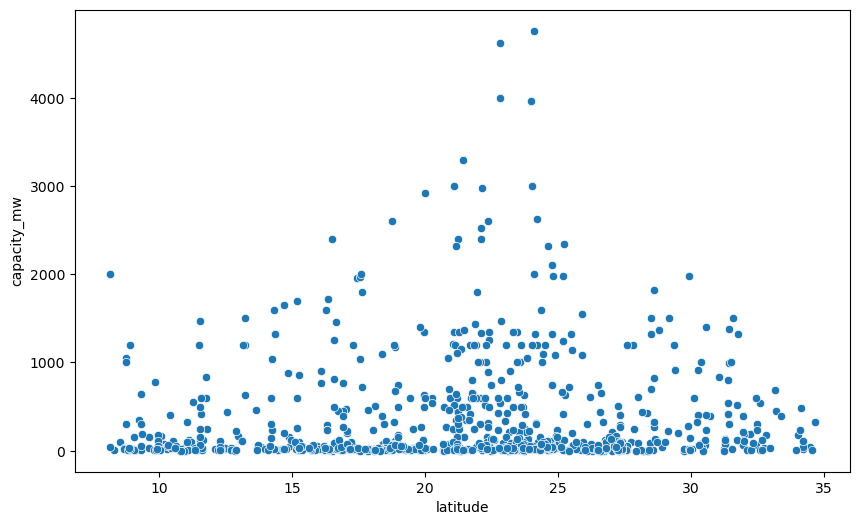

In [27]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "latitude", y = "capacity_mw", data = data)
plt.show()

Highest production between 20-25.

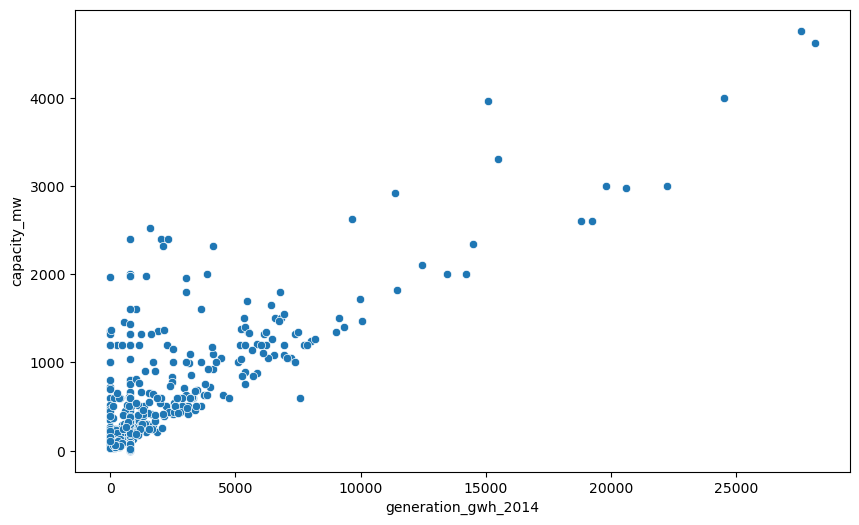

In [28]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = data)
plt.show()

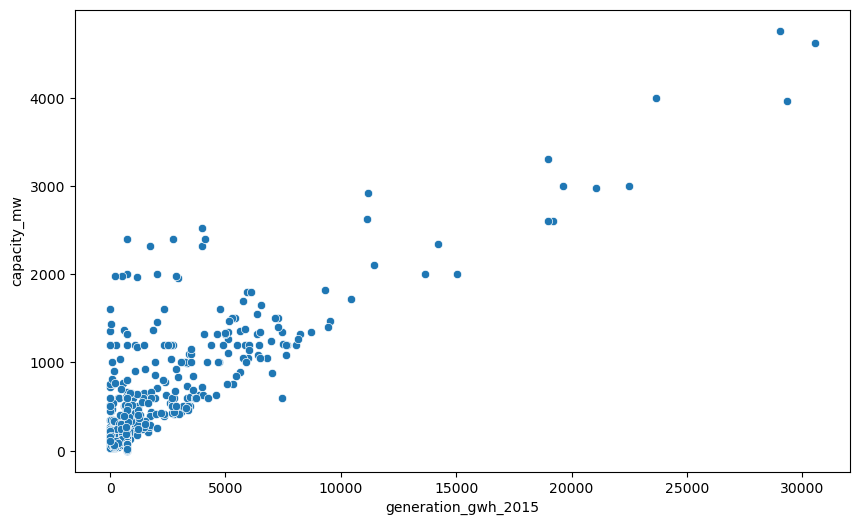

In [29]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "generation_gwh_2015", y = "capacity_mw", data = data)
plt.show()

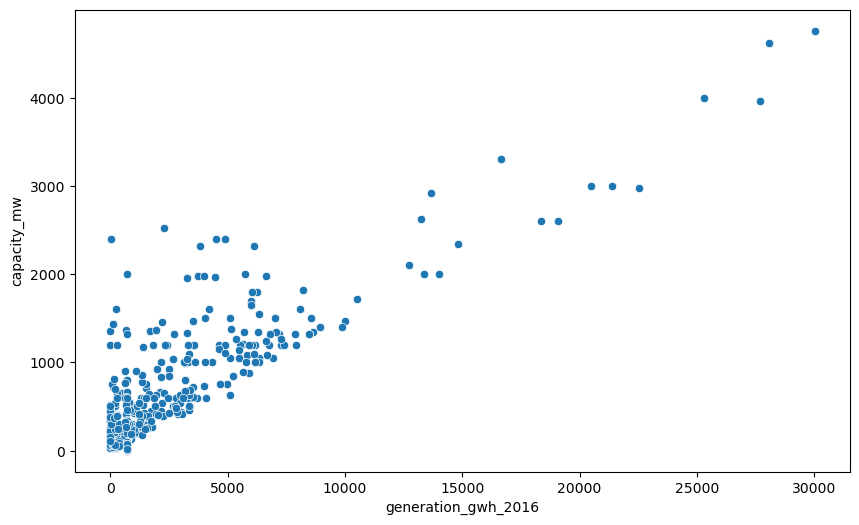

In [30]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "generation_gwh_2016", y = "capacity_mw", data = data)
plt.show()

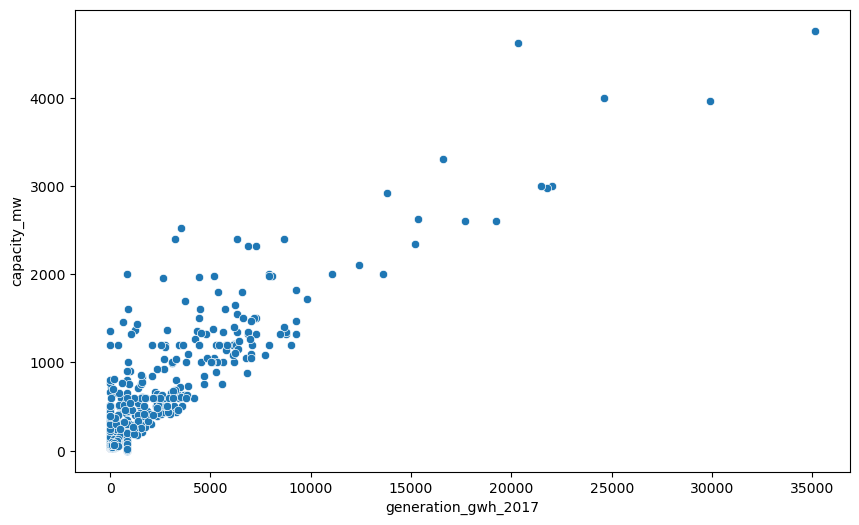

In [31]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "generation_gwh_2017", y = "capacity_mw", data = data)
plt.show()

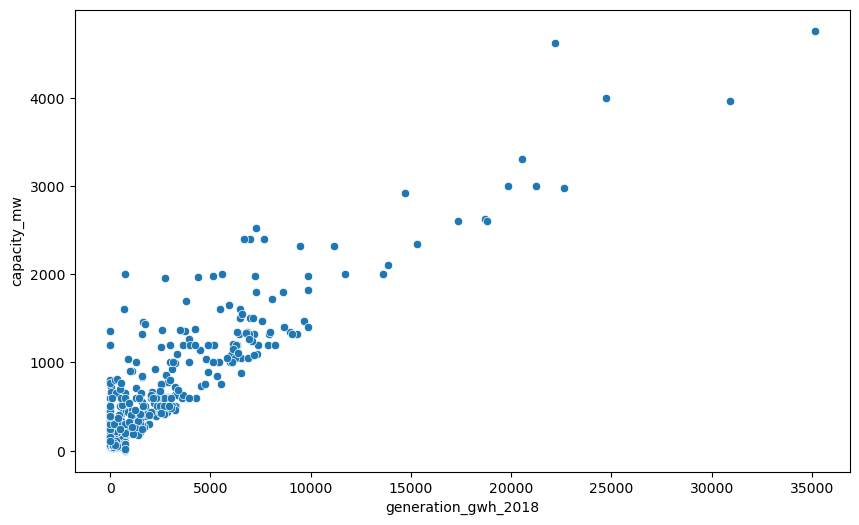

In [32]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "generation_gwh_2018", y = "capacity_mw", data = data)
plt.show()

Clear to see that generation_gwh_2014-2018 has a linear relationship with the target. 

In [33]:
data.dtypes

name                      object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
other_fuel1               object
commissioning_year       float64
owner                     object
source                    object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

In [34]:
#Convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['source','geolocation_source','primary_fuel','other_fuel1']

for i in columns:
    data[i] = le.fit_transform(data[i])

In [35]:
data.head(5)

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,6,2,2011.0,Solar Paces,109,1,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,1,2,2001.0,Ultratech Cement ltd,174,2,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,7,2,2001.0,AES,21,2,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,AGARTALA GT,135.0,23.8712,91.3602,2,2,2004.0,Acc Acc ltd,22,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,1,2,2015.0,Acc Acc ltd,22,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [36]:
#Name and owner won't help with model so will remove
# Dropping columns populated only with NaN
data.drop(columns=["name","owner"], axis=1, inplace=True)

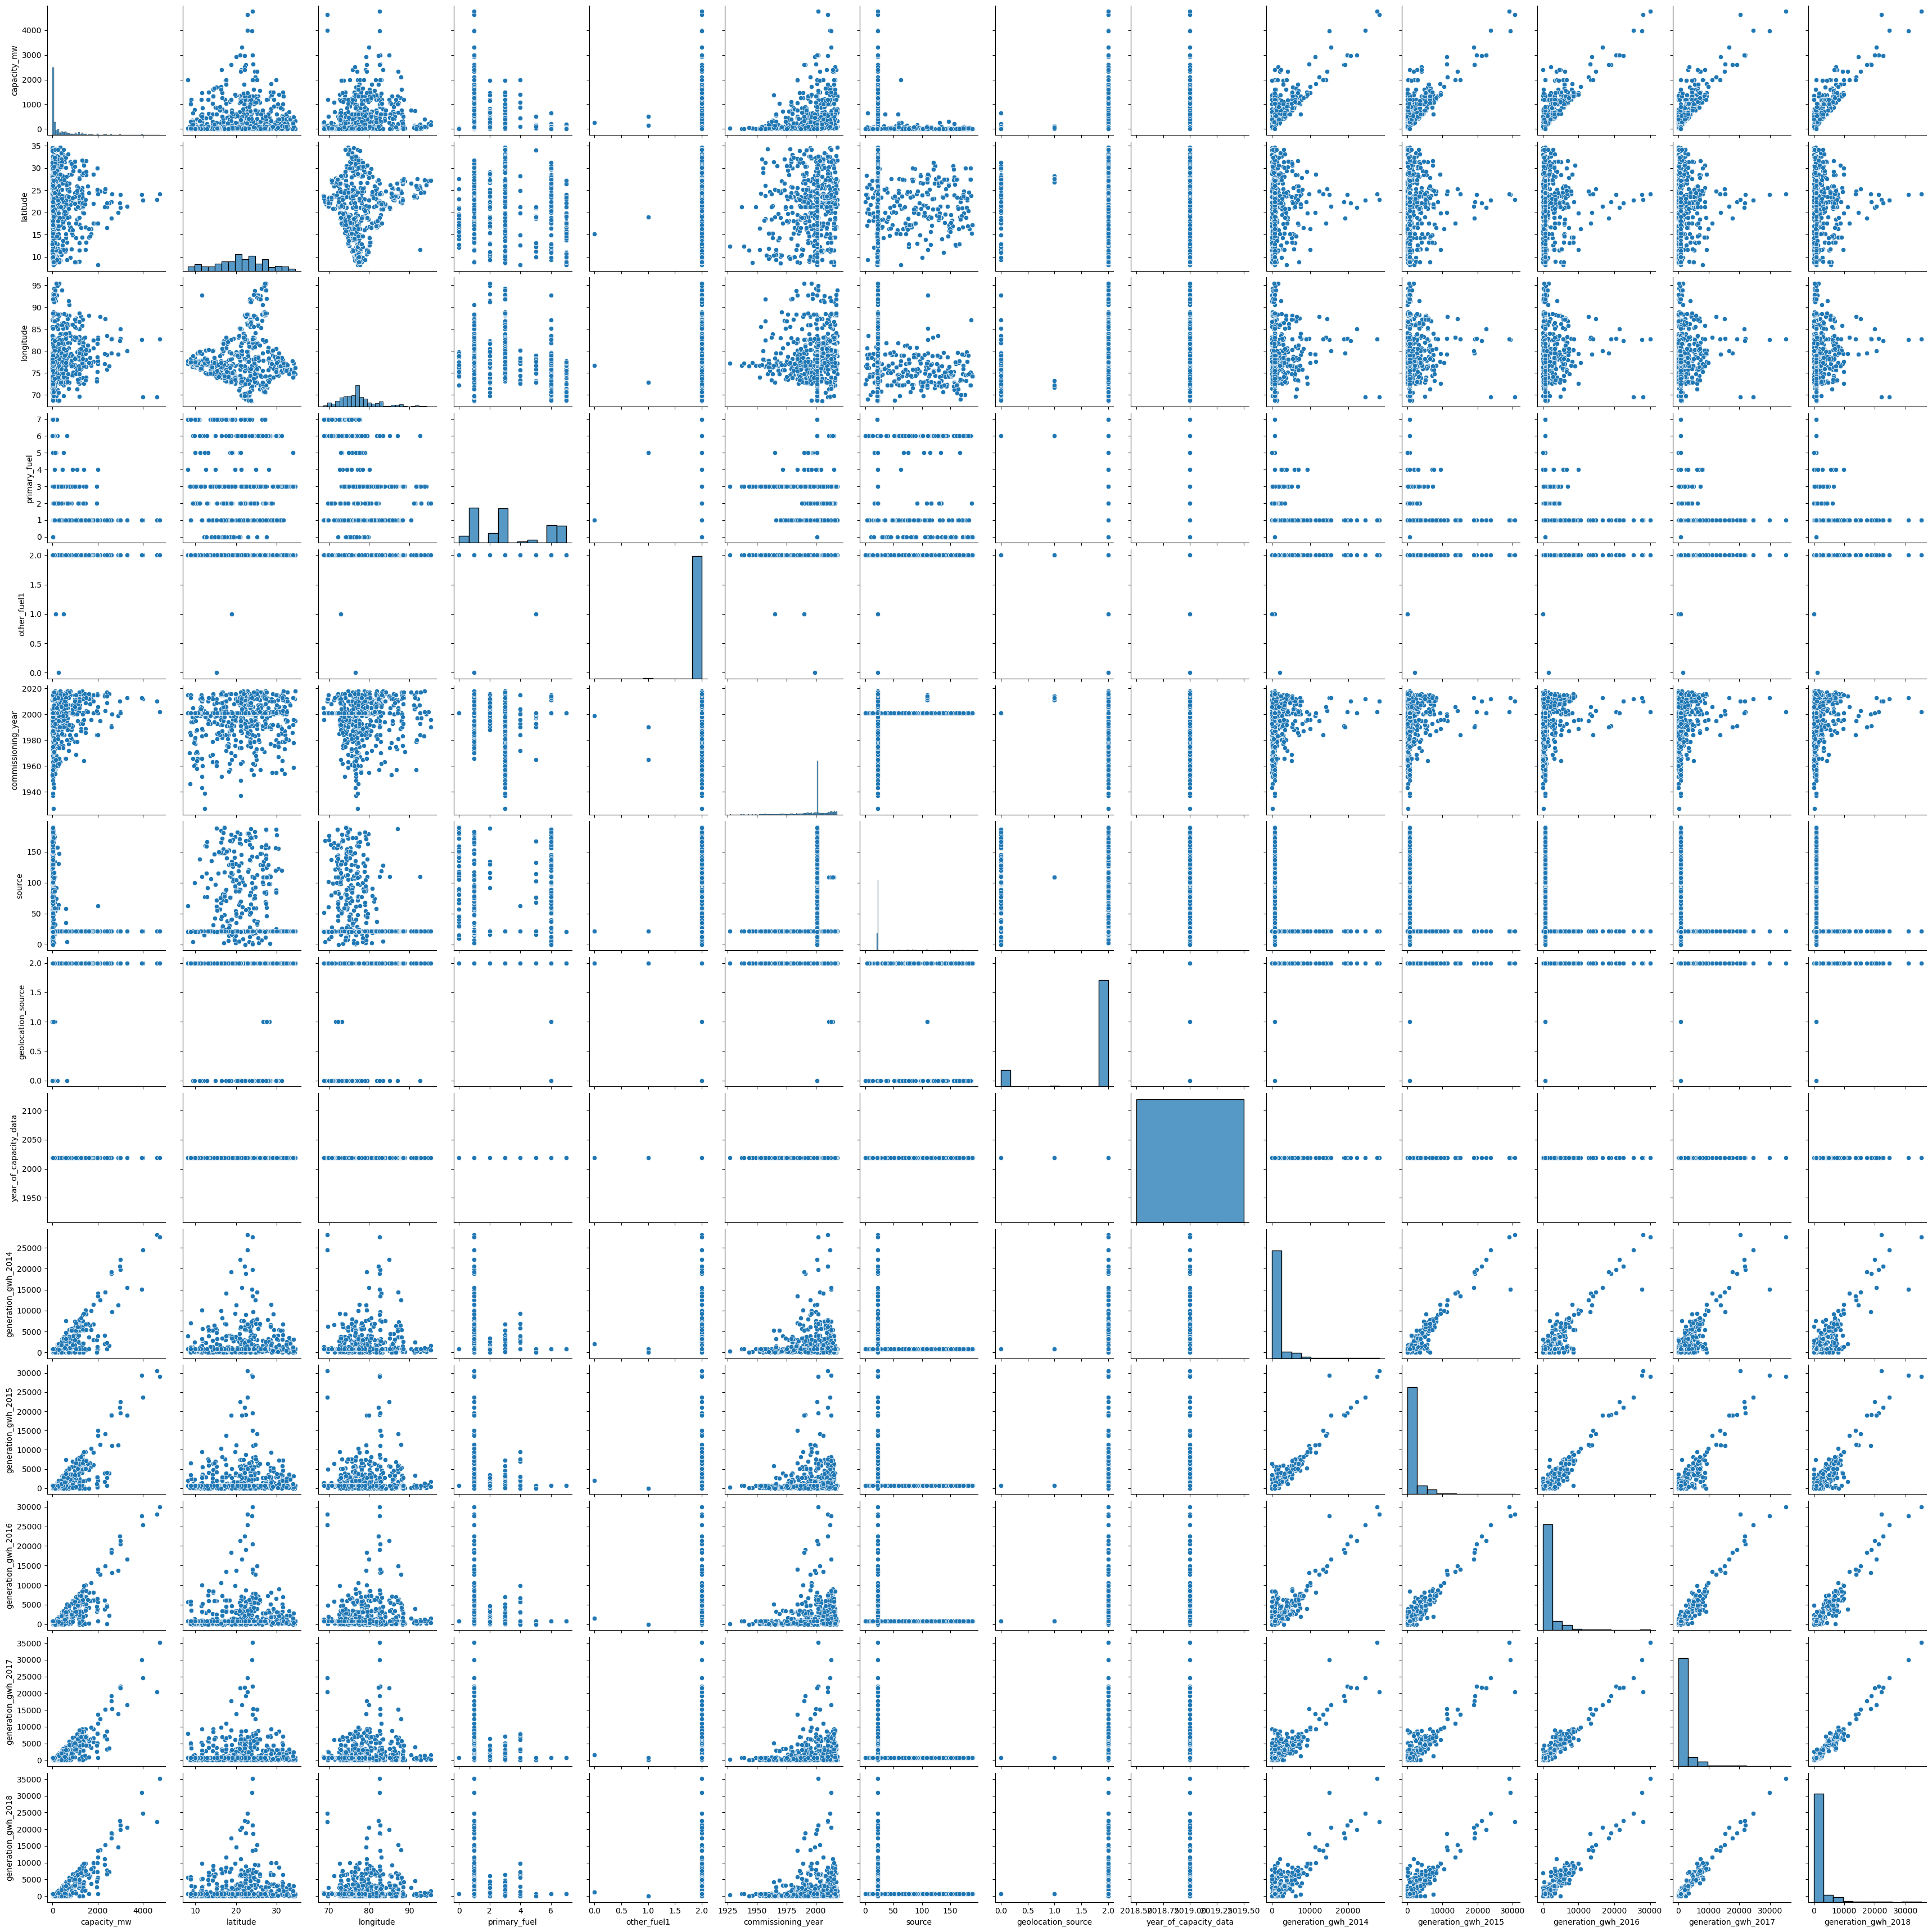

In [37]:
# Checking the scatter plots for every pair of variables in dataset. Looking at identifying patterns and relationships between multiple variables.
sns.pairplot(data,palette="Ocean")

Linear relationships apparent when looking at the pairplot.

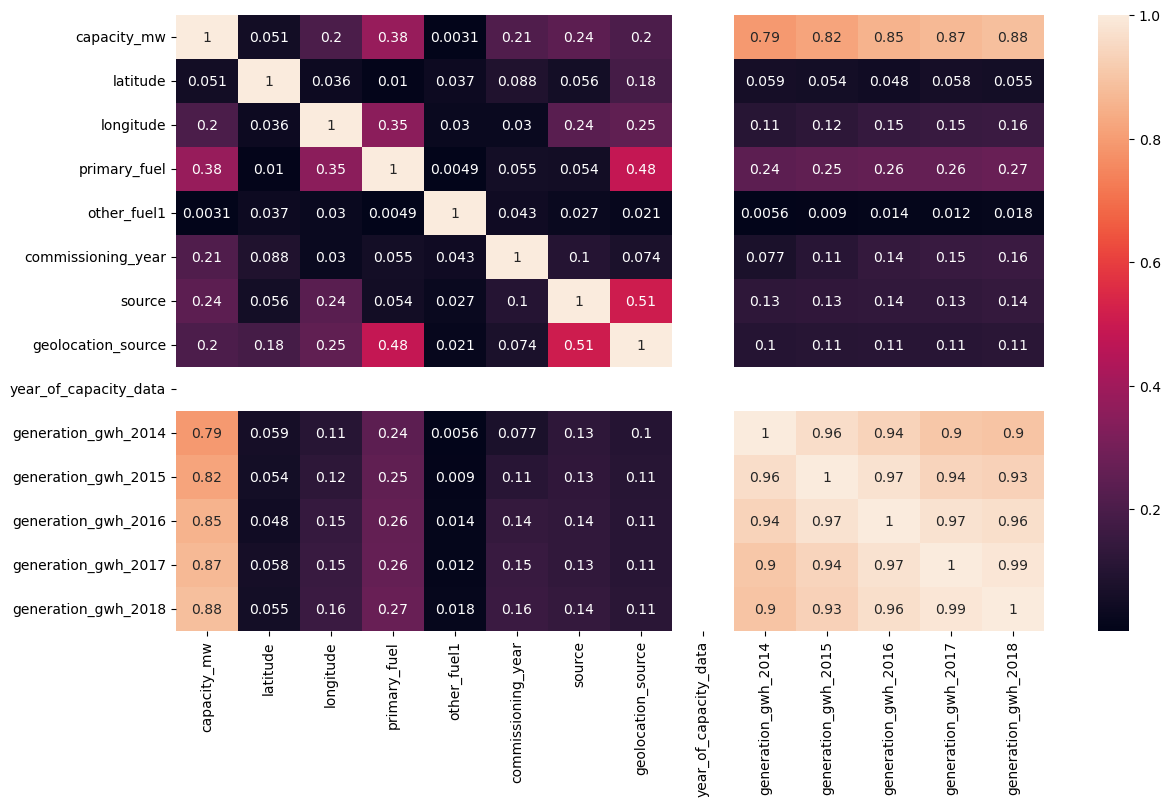

In [38]:
#Explore correlation
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

generation_gwh_2014-2018 unsurprisingly is highly correlated with the target. primary ful and geolocation source is also correlated highly in addition to source and geolocation source.

In [39]:
#Exploring the positive and negative correlation of features 
data.corr()['capacity_mw'].sort_values()

primary_fuel            -0.380395
source                  -0.242122
other_fuel1              0.003105
latitude                 0.050984
longitude                0.199299
geolocation_source       0.204865
commissioning_year       0.211042
generation_gwh_2014      0.793497
generation_gwh_2015      0.819676
generation_gwh_2016      0.853008
generation_gwh_2017      0.868338
generation_gwh_2018      0.884840
capacity_mw              1.000000
year_of_capacity_data         NaN
Name: capacity_mw, dtype: float64

In [40]:
data.drop(columns=["year_of_capacity_data"], axis=1, inplace=True)

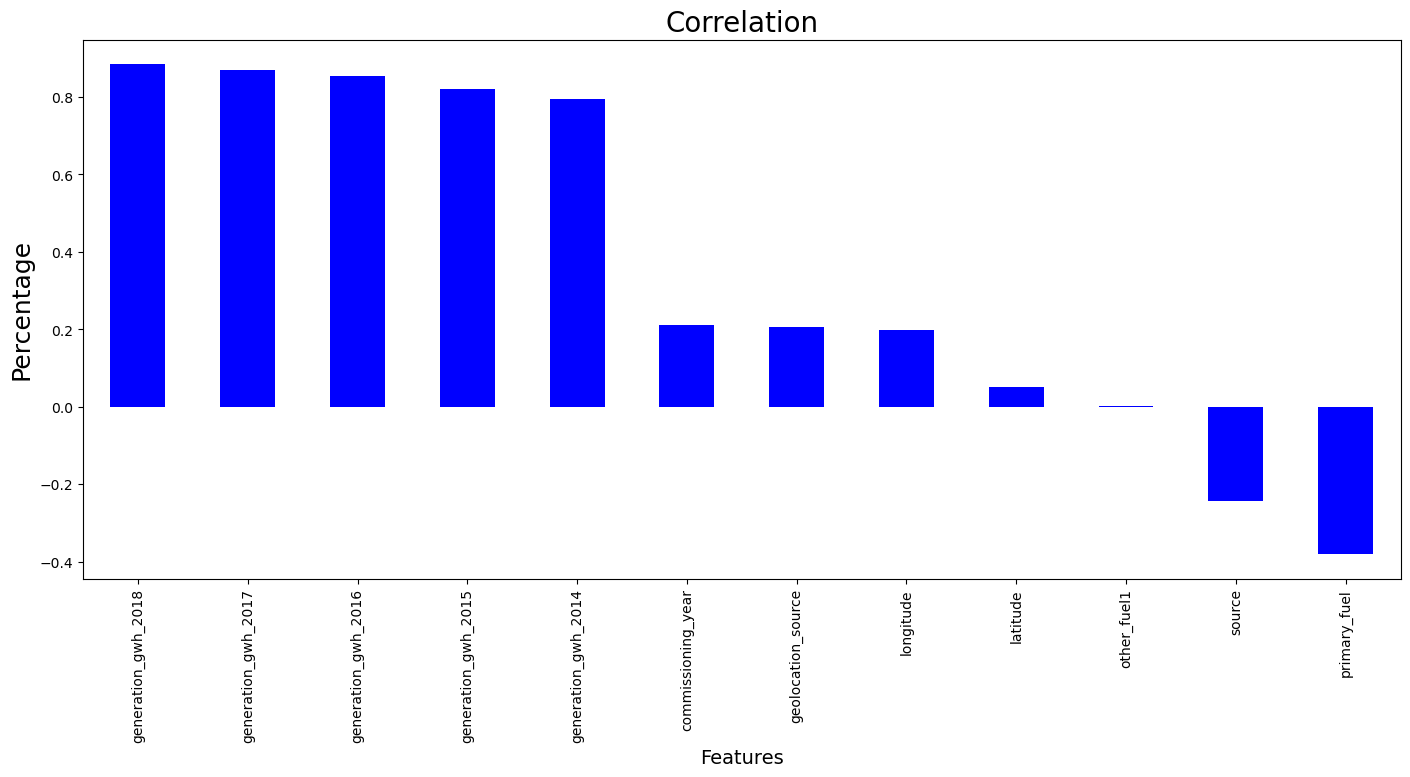

In [41]:
plt.figure(figsize=(17,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='Blue')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Percentage',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

Only two features negatively correlated. However, I do believe they are important to the target so will not delete them. 

capacity_mw               AxesSubplot(0.125,0.786098;0.227941x0.0939024)
latitude               AxesSubplot(0.398529,0.786098;0.227941x0.0939024)
longitude              AxesSubplot(0.672059,0.786098;0.227941x0.0939024)
primary_fuel              AxesSubplot(0.125,0.673415;0.227941x0.0939024)
other_fuel1            AxesSubplot(0.398529,0.673415;0.227941x0.0939024)
commissioning_year     AxesSubplot(0.672059,0.673415;0.227941x0.0939024)
source                    AxesSubplot(0.125,0.560732;0.227941x0.0939024)
geolocation_source     AxesSubplot(0.398529,0.560732;0.227941x0.0939024)
generation_gwh_2014    AxesSubplot(0.672059,0.560732;0.227941x0.0939024)
generation_gwh_2015       AxesSubplot(0.125,0.448049;0.227941x0.0939024)
generation_gwh_2016    AxesSubplot(0.398529,0.448049;0.227941x0.0939024)
generation_gwh_2017    AxesSubplot(0.672059,0.448049;0.227941x0.0939024)
generation_gwh_2018       AxesSubplot(0.125,0.335366;0.227941x0.0939024)
dtype: object

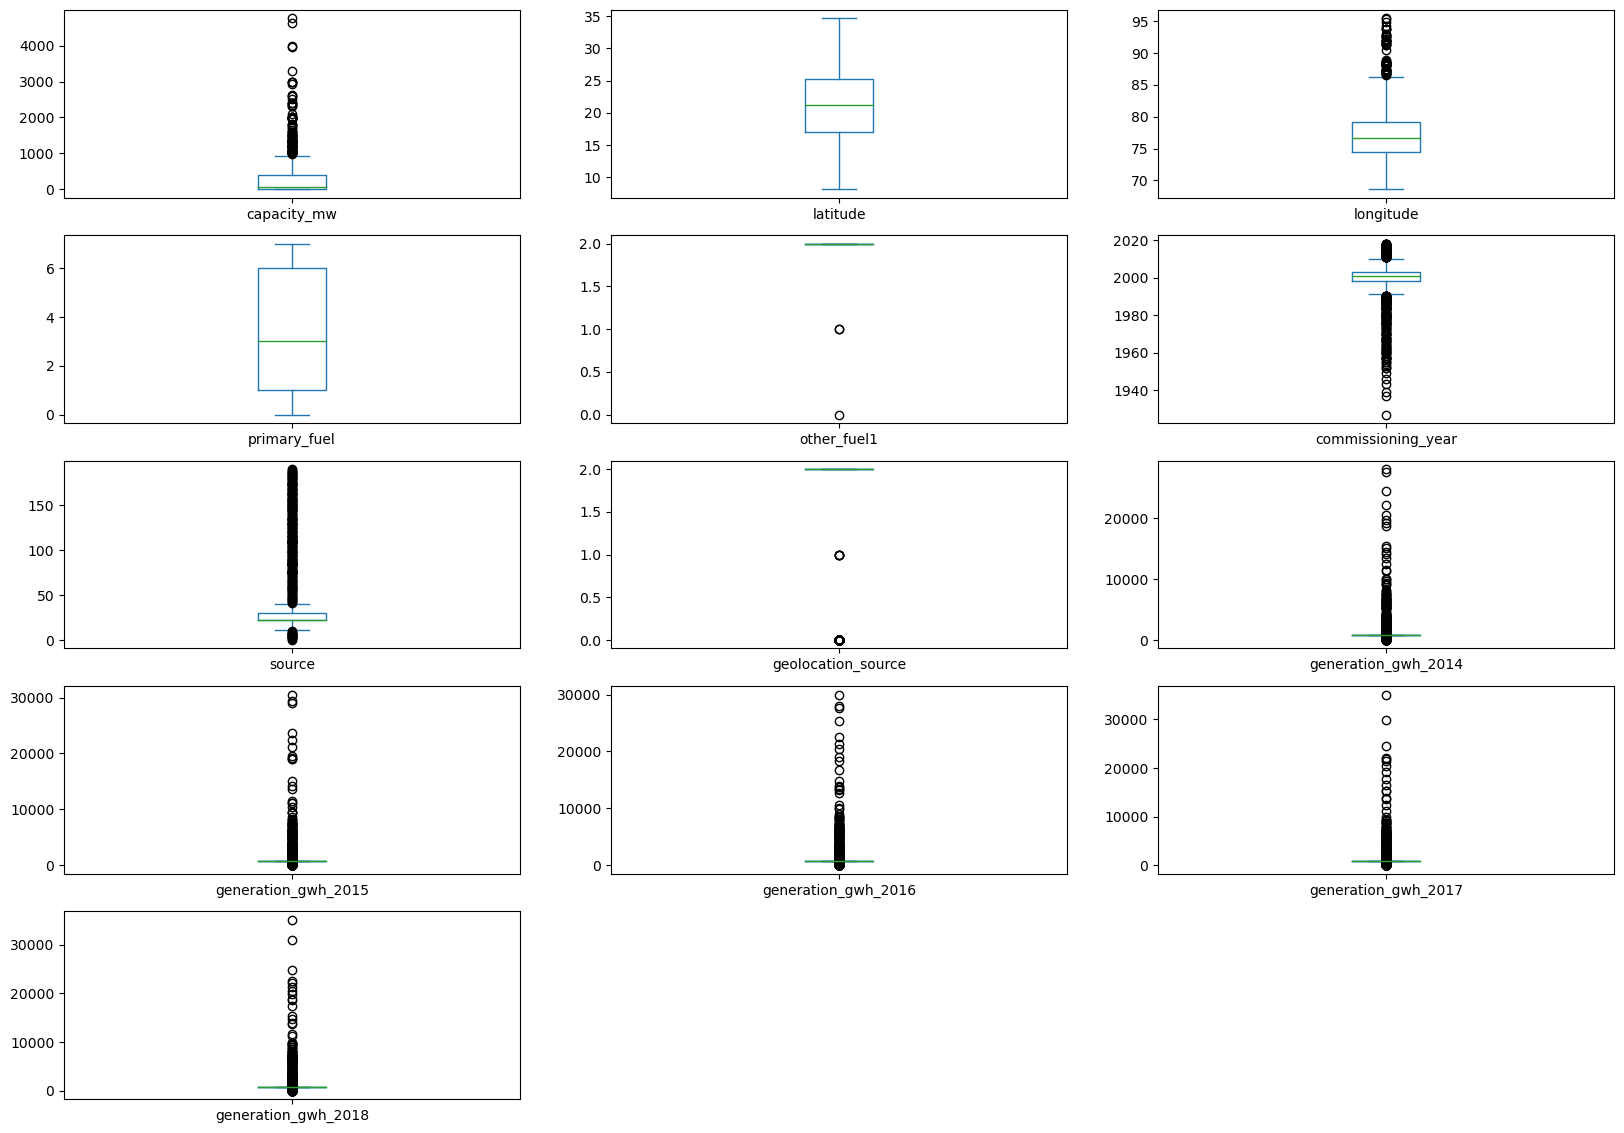

In [42]:
#Exploring outliers
data.plot(kind='box',subplots=True,layout=(7,3),figsize=(20,20))

Majority of features suffer with outliers. I will remove them using zscore method

In [43]:
#Using Zscore to remove outliers
data.shape

(907, 13)

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
        147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 219, 222,
        244, 299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342,
        345, 360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427,
        444, 454, 478, 482, 482, 484, 493, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 494, 499, 519, 532, 538, 541, 546, 573, 577,
        583, 592, 601, 621, 623, 638, 648, 648, 648, 648, 648, 648, 657,
        657, 657, 657, 657, 657, 661, 669, 689, 695, 695, 695, 695, 695,
        695, 706, 709, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724,
        726, 726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786,
        786, 788, 807, 808, 808, 808, 808, 808, 808, 811, 813, 817, 818,
        832, 847, 848, 870, 871, 879, 880, 880, 880, 880, 880, 880, 895,
        900], dtype=int64),
 array([ 0,  9, 10, 11, 12,  6,  6,  0,  8,  9, 10, 11, 12,  0,  8,  2,  2,
         6,  0,  8, 

In [45]:
outliers = np.where(z>3)
outlier_rows = outliers[0]
data_new = data.drop(outlier_rows)

In [46]:
data_new.shape

(828, 13)

In [47]:
DataLoss=((907-828)/907)*100
DataLoss

8.710033076074973

8.7% Data loss. This is fine.

In [48]:
#Dealing with skewness before model training
data_new.skew()

capacity_mw            1.963792
latitude              -0.124829
longitude              0.934725
primary_fuel           0.410332
other_fuel1            0.000000
commissioning_year    -1.270312
source                 1.773039
geolocation_source    -2.092081
generation_gwh_2014    2.925367
generation_gwh_2015    2.726419
generation_gwh_2016    2.663613
generation_gwh_2017    2.561652
generation_gwh_2018    2.626671
dtype: float64

In [49]:
data_new.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [50]:
#Using Yeojohnson to deal with skewness
from sklearn.preprocessing import PowerTransformer

columns_to_transform=['commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']          
PT = PowerTransformer(method='yeo-johnson')

data_new[columns_to_transform] = PT.fit_transform(data_new[columns_to_transform])


In [51]:
data_new.skew()

capacity_mw            1.963792
latitude              -0.124829
longitude              0.934725
primary_fuel           0.410332
other_fuel1            0.000000
commissioning_year    -0.317237
source                -0.174683
geolocation_source    -2.064021
generation_gwh_2014    0.228324
generation_gwh_2015    0.165435
generation_gwh_2016    0.150604
generation_gwh_2017    0.124576
generation_gwh_2018    0.134024
dtype: float64

Skew has been reduced

In [52]:
#Seperate into dependent and independent variables
x=data_new.drop (columns=['capacity_mw'], axis=1)
y=data_new['capacity_mw']

In [53]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data_new)
x_scaled

array([[-0.63371866,  1.15510053, -0.87956296, ..., -0.04448927,
        -0.02683649, -0.05161944],
       [-0.40754966,  0.59690363, -0.56262645, ..., -0.04448927,
        -0.02683649, -0.05161944],
       [-0.54680346,  0.12937127, -1.77538401, ..., -0.04448927,
        -0.02683649, -0.05161944],
       ...,
       [-0.57924864, -0.95318051, -0.33746093, ..., -0.04448927,
        -0.02683649, -0.05161944],
       [-0.45017837,  0.52890932, -0.76212759, ..., -0.04448927,
        -0.02683649, -0.05161944],
       [-0.600563  , -1.82559182,  0.10163616, ..., -0.04448927,
        -0.02683649, -0.05161944]])

In [54]:
#Split data into Xtrain/test and ytrain/test
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 3)

In [55]:
#import libraries for ML training
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.32689118 0.42691793 0.60139004 0.55164616 0.6911544 ]
0.5195999425396317


In [56]:
lr.fit(x_train, y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

print("R-squared Train:", r2_train)
print("R-squared Test:", r2_test)


R-squared Train: 0.5701759942304616
R-squared Test: 0.49395485445462983


Quite low scores. I will compare with another ML model

In [57]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_train = dt.predict(x_train)
pred_test = dt.predict(x_test)

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

print("R-squared Train:", r2_train)
print("R-squared Test:", r2_test)

R-squared Train: 0.9998738793509766
R-squared Test: 0.4339535393781796


Poor test results- evidence of overfitting. I will compare with another ML model. 

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
pred_train = rf.predict(x_train)
pred_test = rf.predict(x_test)

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

print("R-squared Train:", r2_train)
print("R-squared Test:", r2_test)

R-squared Train: 0.9682196777965139
R-squared Test: 0.7115151866962572


Significantly better than previous models. I will continue with RandomForesetRegressor

In [59]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [60]:
#Using gridsearch to find best parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error on Test Set: 49490.304368407844


In [62]:
rf=RandomForestRegressor(max_depth=20, min_samples_leaf=4,min_samples_split=10, n_estimators=50, bootstrap=True)
rf.fit(x_train,y_train)
rf_score_training = rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)
rf_score_training*100

89.02688006449702

Happy with this as a training score

In [64]:
import pickle
filename= 'globalpowerplant.pkl'
pickle.dump(rf, open(filename,'wb'))
loaded_model= pickle.load(open('globalpowerplant.pkl', 'rb'))